In [260]:
import os
import json
import time
from tqdm import tqdm
import pandas as pd
import openai
openai.api_type = "azure"
openai.api_base = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
openai.api_key = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

In [237]:
# !unzip "train.csv.zip"

In [238]:
train=pd.read_csv("train.csv")
train.head()

,FileName,Abstract,RHS
0,S0262885614000857,This paper introduces four classes of rotatio...,We generalize polar harmonic transforms for pa...
1,S0169260715300419,In this paper a MATLAB based graphical user i...,Design of a MATLAB based GUI tool for general ...
2,S0169260715003260,Background and objective A markerless low cos...,A markerless low cost system for the estimatio...
3,S0262885613001443,This paper presents an improved multiple inst...,We adopt Distribution Field DF layer as featur...
4,S0262885614000511,Text based image retrieval may perform poorly...,A system that constructs multi instance bags f...


## Davinci 

In [254]:
def get_davinci_answer(abstract):
    response = openai.Completion.create(
      engine= "text-davinci-003",
      prompt = """Generate summary from following text:+\n"""+ abstract,
      temperature=0,
      max_tokens=500,
      top_p=0.1,
      frequency_penalty=0,
      presence_penalty=0,
      stop=None)
    output=response["choices"][0]["text"].strip()
    return output

In [261]:
t1=[]
for i in tqdm(range(100)):
    t0=time.time()
    resp=get_davinci_answer(train['Abstract'].iloc[i])
    t1.append((time.time()-t0,len(resp),resp))
 

100%|██████████| 100/100 [04:46<00:00,  2.86s/it]


In [271]:
davinci_df=pd.DataFrame(t1,columns=['Davinci_Time','Davinci_CharCount','Davinci_Summary'])
davinci_df

,Davinci_Time,Davinci_CharCount,Davinci_Summary
0,3.143097,814,This paper presents four classes of rotation i...
1,2.494984,610,This paper introduces a MATLAB-based graphical...
2,3.061442,767,This paper presents a low cost prototype devel...
3,2.319576,676,This paper presents an improved multiple insta...
4,1.719553,485,This paper proposes a system to improve the pe...
...,...,...,...
95,3.497816,715,This paper proposes a 3D spatial field called ...
96,3.422866,912,This paper presents an innovative method of co...
97,5.004664,769,This study aimed to validate a novel ankle hap...
98,2.692991,789,Mobile devices such as phones and tablets have...


## Turbo

In [266]:
def get_turbo_answer(abstract):
    response = openai.Completion.create(
      engine= "gpt-35-turbo-chatgpt",
      prompt ="""Generate summary from following text:+\n"""+ abstract,
      temperature=0,
      max_tokens=500,
      top_p=0.1,
      frequency_penalty=0,
      presence_penalty=0,
      stop=None)
    output=response["choices"][0]["text"].strip()
    return output

In [269]:
t2=[]
for i in tqdm(range(0,100)):
    t0=time.time()
    resp=get_turbo_answer(train['Abstract'].iloc[i])
    t2.append((time.time()-t0,len(resp),resp))

100%|██████████| 68/68 [12:08<00:00, 10.72s/it]


In [272]:
turbo_df=pd.DataFrame(t2,columns=['Turbo_Time','Turbo_CharCount','Turbo_Summary'])
turbo_df

,Turbo_Time,Turbo_CharCount,Turbo_Summary
0,13.709167,2913,The paper introduces four classes of rotation ...
1,3.760615,565,The paper describes a MATLAB based graphical u...
2,12.973149,2510,The study aimed to develop a low cost prototyp...
3,15.717335,2743,The paper presents an improved multiple instan...
4,12.853102,2667,Summary: A system that automatically construct...
...,...,...,...
95,11.964677,2652,Summary: The paper proposes a 3D spatial field...
96,11.455461,2555,The paper presents a method of converting aver...
97,16.279106,2578,Summary: A study was conducted to validate a n...
98,2.207500,312,The paper describes FIRME as a biometric appli...


In [276]:
merged_df=pd.concat([davinci_df,turbo_df],axis=1)

>> There is tradeoff b/w Davinci and Turbo performance in terms of Time Vs Price

## Time Comparsion

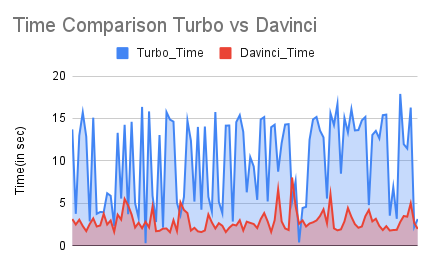

## Token Len Comparison

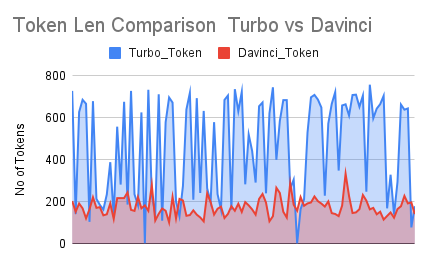

## Price Comparison

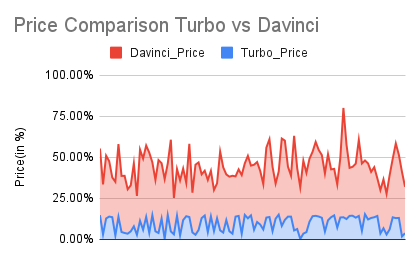